In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy

In [10]:
# create adjacency weight matrix
def getClusters(data, c):
    """ Spectral Clustering Implementation.
    
    Args:
      data (array) : data points of n dimensions
      c (scalar) :  scale parameter
      
    Returns:
      clusters (array): predicted labels forming clusters in the data
    """
    
    # create adjacency weight matrix
    datapoints, dims = data.shape 
    W = np.zeros((datapoints, datapoints))
    for i in range(datapoints):
        for j in range(datapoints):
            W[i][j] = np.exp(-c*(np.linalg.norm(data[i] - data[j])**2))
            

    # calculating degree matrix
    D = np.identity(datapoints)
    for i in range(W.shape[0]):
        D[:,i] = D[:,i]*np.sum(W[:,i])
    
    # create graph laplacian matrix
    L = D - W

    # get eigensystem
    w, v = np.linalg.eig(L)
    # ensure eigenvalues are sorted!
    v_two = np.array((v[:,1])).ravel()
    # cluster data given sign of the 
    clusters = np.zeros((datapoints))
    # determining clusters given sign of second eigenvector
    for i in range(datapoints):
        if v_two[i] < 0:
            clusters[i] = 1
        elif v_two[i] > 0:
            clusters[i] = -1
            
    return clusters

def plotClusters(pts, clusters, plotname):
    """ plots computed clusters and saves figures """

    for i in range(len(pts)):
        if clusters[i] == 1:
            plt.scatter(pts[:,0][i],pts[:,1][i], c= 'r')
        elif clusters[i] == -1:
            plt.scatter(pts[:,0][i],pts[:,1][i], c= 'b')


    plt.savefig("%s.png"%plotname)
    plt.show()

def getMisclassification(pred, true):
    """ Computes misclassification error """
    return np.count_nonzero(pred - true)/len(pred)



### Question 1 - Two Moons

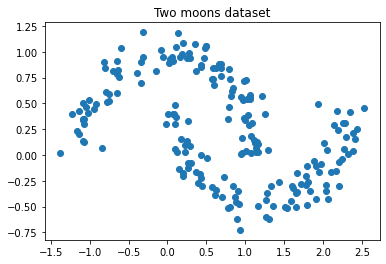

In [16]:
tm_data = np.loadtxt('twomoons.dat')
points = np.zeros((len(tm_data[: , 1]),2))
points[: , 0] = tm_data[: , 1]
points[: , 1] = tm_data[: , 2]
labels = tm_data[: , 0]
plt.scatter(points[: , 0],points[: , 1])
plt.title('Two moons dataset')
plt.show()

In [18]:
# computing clusters of the two moon data set for a range of c values
c_values = 2**(np.linspace(-10,10,201))
cluster_result =[]

for c in c_values:
    pred = getClusters(points, c)
    err = getMisclassification(pred, labels)
    cluster_result.append(err)
    print('The MSE for a value of c =',c,'is',err)

The MSE for a value of c = 0.0009765625 is 0.665
The MSE for a value of c = 0.0010466537720080985 is 0.665
The MSE for a value of c = 0.0011217757373017914 is 0.665
The MSE for a value of c = 0.0012022894661571455 is 0.665
The MSE for a value of c = 0.001288581944114155 is 0.665
The MSE for a value of c = 0.0013810679320049757 is 0.665
The MSE for a value of c = 0.0014801919594828103 is 0.665
The MSE for a value of c = 0.0015864304616332718 is 0.665
The MSE for a value of c = 0.0017002940689377433 is 0.665
The MSE for a value of c = 0.0018223300615953274 is 0.665
The MSE for a value of c = 0.001953125 is 0.335
The MSE for a value of c = 0.002093307544016197 is 0.665
The MSE for a value of c = 0.002243551474603583 is 0.665
The MSE for a value of c = 0.002404578932314291 is 0.665
The MSE for a value of c = 0.00257716388822831 is 0.665
The MSE for a value of c = 0.0027621358640099515 is 0.335
The MSE for a value of c = 0.0029603839189656206 is 0.335
The MSE for a value of c = 0.0031728609

The MSE for a value of c = 39.39662122703734 is 0.525
The MSE for a value of c = 42.22425314473263 is 0.475
The MSE for a value of c = 45.254833995939045 is 0.47
The MSE for a value of c = 48.502930128332785 is 0.495
The MSE for a value of c = 51.98415336679911 is 0.48
The MSE for a value of c = 55.71523605095197 is 0.475
The MSE for a value of c = 59.71411145835569 is 0.52
The MSE for a value of c = 64.0 is 0.49
The MSE for a value of c = 68.59350160232283 is 0.54
The MSE for a value of c = 73.5166947198102 is 0.525
The MSE for a value of c = 78.79324245407469 is 0.48
The MSE for a value of c = 84.44850628946536 is 0.535
The MSE for a value of c = 90.50966799187809 is 0.51
The MSE for a value of c = 97.00586025666557 is 0.515
The MSE for a value of c = 103.9683067335981 is 0.53
The MSE for a value of c = 111.43047210190394 is 0.495
The MSE for a value of c = 119.42822291671152 is 0.49
The MSE for a value of c = 128.0 is 0.5
The MSE for a value of c = 137.18700320464566 is 0.525
The MS

Best clustering is for a c value of: 19.69831061351867 for an error of 0.0


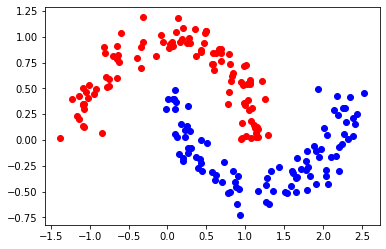

In [20]:
# Obtaining the optimal c value, for which the clustering produces the smallest misclassification error
print('Best clustering is for a c value of:',c_values[np.argmin(cluster_result)], 'for an error of',min(cluster_result))

# plot clusters with optimal c
best_cluster = getClusters(points, c_values[np.argmin(cluster_result)])
plotClusters(points, best_cluster, 'twomoons')

### Question 2 - Gaussian Clusters

(40, 2)


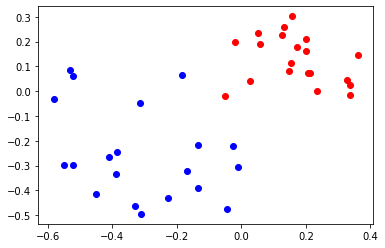

In [7]:
cluster1 = np.random.multivariate_normal([-0.3,-0.3], np.identity(2)*0.04,20)
labels1 = np.ones(20)*-1
cluster2 = np.random.multivariate_normal([0.15, 0.15],np.identity(2)*0.01,20)
labels2 = np.ones(20)

gaussian_points = np.concatenate((cluster1, cluster2), axis =0)
gaussian_labels = np.concatenate((labels1, labels2), axis =0)
#plotting ground truth
plotClusters(gaussian_points, gaussian_labels, 'gaussianpointstruth')

In [8]:
c_gauss = 2**(np.linspace(-10,10,201))
gauss_results= []

#searching for a value of c that computes the best clustering
for c in c_gauss:
    gaussian_pred = getClusters(gaussian_points, c)
    gaussian_err = getMisclassification(gaussian_pred, gaussian_labels)
    gauss_results.append(gaussian_err)
    print('The MSE for a value of c =',c,'is',gaussian_err)

The MSE for a value of c = 0.0009765625 is 0.05
The MSE for a value of c = 0.0010466537720080985 is 0.05
The MSE for a value of c = 0.0011217757373017914 is 0.05
The MSE for a value of c = 0.0012022894661571455 is 0.95
The MSE for a value of c = 0.001288581944114155 is 0.95
The MSE for a value of c = 0.0013810679320049757 is 0.95
The MSE for a value of c = 0.0014801919594828103 is 0.95
The MSE for a value of c = 0.0015864304616332718 is 0.95
The MSE for a value of c = 0.0017002940689377433 is 0.95
The MSE for a value of c = 0.0018223300615953274 is 0.95
The MSE for a value of c = 0.001953125 is 0.05
The MSE for a value of c = 0.002093307544016197 is 0.95
The MSE for a value of c = 0.002243551474603583 is 0.95
The MSE for a value of c = 0.002404578932314291 is 0.05
The MSE for a value of c = 0.00257716388822831 is 0.95
The MSE for a value of c = 0.0027621358640099515 is 0.05
The MSE for a value of c = 0.0029603839189656206 is 0.05
The MSE for a value of c = 0.0031728609232665435 is 0.05

The MSE for a value of c = 51.98415336679911 is 0.525
The MSE for a value of c = 55.71523605095197 is 0.55
The MSE for a value of c = 59.71411145835569 is 0.5
The MSE for a value of c = 64.0 is 0.5
The MSE for a value of c = 68.59350160232283 is 0.475
The MSE for a value of c = 73.5166947198102 is 0.5
The MSE for a value of c = 78.79324245407469 is 0.475
The MSE for a value of c = 84.44850628946536 is 0.5
The MSE for a value of c = 90.50966799187809 is 0.5
The MSE for a value of c = 97.00586025666557 is 0.55
The MSE for a value of c = 103.9683067335981 is 0.45
The MSE for a value of c = 111.43047210190394 is 0.525
The MSE for a value of c = 119.42822291671152 is 0.475
The MSE for a value of c = 128.0 is 0.475
The MSE for a value of c = 137.18700320464566 is 0.475
The MSE for a value of c = 147.0333894396204 is 0.5
The MSE for a value of c = 157.58648490814937 is 0.5
The MSE for a value of c = 168.8970125789307 is 0.55
The MSE for a value of c = 181.01933598375618 is 0.575
The MSE for a

Best clustering is for a c value of: 2.6390158215457893 for an error of 0.025


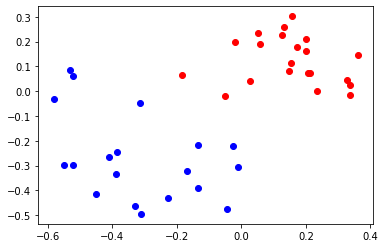

In [19]:
# Obtaining the optimal c value, for which the clustering produces the smallest misclassification error
print('Best clustering is for a c value of:',c_gauss[np.argmin(gauss_results)], 'for an error of',min(gauss_results))

# plot clusters with optimal c
best_cluster = getClusters(gaussian_points, c_gauss[np.argmin(gauss_results)])
plotClusters(gaussian_points, best_cluster, 'gaussian_points')

### Question 3 - Digit Data

In [121]:
dtrain = np.loadtxt('dtrain123.dat')
#filter where element of first element is 2
removal = [i for i in range(dtrain.shape[0]) if dtrain[:,0][i] == 2]
new_data = np.delete(dtrain, removal, axis =0)
digit_labels = new_data[:,0]
digit_points = new_data[:,1:]

(190,) (190, 256)


In [122]:
# Mapping 1 and 3 to 1 and -1
labels = 2 * (digit_labels == 1) - 1

In [123]:
c_digit = 2**(np.linspace(-10,10,201))
digit_results= []

#searching for a value of c that computes the best clustering
for c in c_digit:
    digit_clusters = getClusters(digit_points, c)
    digit_err = getMisclassification(digit_clusters, labels)
    digit_results.append(digit_err)
    print('The MSE for a value of c =',c,'is',digit_err)

The MSE for a value of c = 0.0009765625 is 0.8789473684210526
The MSE for a value of c = 0.0010466537720080985 is 0.8789473684210526
The MSE for a value of c = 0.0011217757373017914 is 0.8789473684210526
The MSE for a value of c = 0.0012022894661571455 is 0.8789473684210526
The MSE for a value of c = 0.001288581944114155 is 0.12105263157894737
The MSE for a value of c = 0.0013810679320049757 is 0.12105263157894737
The MSE for a value of c = 0.0014801919594828103 is 0.12105263157894737
The MSE for a value of c = 0.0015864304616332718 is 0.12105263157894737
The MSE for a value of c = 0.0017002940689377433 is 0.8789473684210526
The MSE for a value of c = 0.0018223300615953274 is 0.12105263157894737
The MSE for a value of c = 0.001953125 is 0.8842105263157894
The MSE for a value of c = 0.002093307544016197 is 0.8842105263157894
The MSE for a value of c = 0.002243551474603583 is 0.8842105263157894
The MSE for a value of c = 0.002404578932314291 is 0.8842105263157894
The MSE for a value of c

The MSE for a value of c = 4.924577653379668 is 0.8315789473684211
The MSE for a value of c = 5.278031643091579 is 0.7052631578947368
The MSE for a value of c = 5.656854249492381 is 0.8315789473684211
The MSE for a value of c = 6.062866266041598 is 0.8842105263157894
The MSE for a value of c = 6.498019170849889 is 0.9105263157894737
The MSE for a value of c = 6.9644045063689966 is 0.8789473684210526
The MSE for a value of c = 7.464263932294461 is 0.9631578947368421
The MSE for a value of c = 8.0 is 0.6684210526315789
The MSE for a value of c = 8.574187700290354 is 0.968421052631579
The MSE for a value of c = 9.189586839976286 is 0.8842105263157894
The MSE for a value of c = 9.849155306759336 is 0.9157894736842105
The MSE for a value of c = 10.556063286183157 is 0.9473684210526315
The MSE for a value of c = 11.313708498984761 is 0.9894736842105263
The MSE for a value of c = 12.125732532083196 is 0.5210526315789473
The MSE for a value of c = 12.996038341699778 is 0.6105263157894737
The M

In [127]:
print('Best clustering is for a c value of:',c_digit[np.argmin(digit_results)],'for an error of', min(digit_results))

Best clustering is for a c value of: 0.04123462221165296 for an error of 0.06842105263157895


#### Implementing CP correctness

In [130]:
def clusterPercentage(pred, true):
    ''' implementation of the cluster correctness percentage'''
    l = len(pred)
    l_minus = np.count_nonzero(pred-true)
    
    l_plus = l - l_minus
    
    cp = max(l_plus, l_minus)/l
    
    return cp

In [131]:
cp_c = np.linspace(0,0.1,51)
cp_results= []

#searching for a value of c that computes the best clustering
for c in cp_c:
    cp_pred = getClusters(digit_points, c)
    cp = clusterPercentage(cp_pred, labels)
    cp_results.append(cp)
    print('The correct cluster percentage for a value of c =',c,'is',digit_err)

The correct cluster percentage for a value of c = 0.0 is 0.9947368421052631
The correct cluster percentage for a value of c = 0.002 is 0.9947368421052631
The correct cluster percentage for a value of c = 0.004 is 0.9947368421052631
The correct cluster percentage for a value of c = 0.006 is 0.9947368421052631
The correct cluster percentage for a value of c = 0.008 is 0.9947368421052631
The correct cluster percentage for a value of c = 0.01 is 0.9947368421052631
The correct cluster percentage for a value of c = 0.012 is 0.9947368421052631
The correct cluster percentage for a value of c = 0.014 is 0.9947368421052631
The correct cluster percentage for a value of c = 0.016 is 0.9947368421052631
The correct cluster percentage for a value of c = 0.018000000000000002 is 0.9947368421052631
The correct cluster percentage for a value of c = 0.02 is 0.9947368421052631
The correct cluster percentage for a value of c = 0.022 is 0.9947368421052631
The correct cluster percentage for a value of c = 0.0

In [135]:
print('Best clustering is for a c value of:',cp_c[np.argmin(cp_results)],'for an clustered percentage of', max(cp_results))

Best clustering is for a c value of: 0.044 for an clustered percentage of 0.9315789473684211


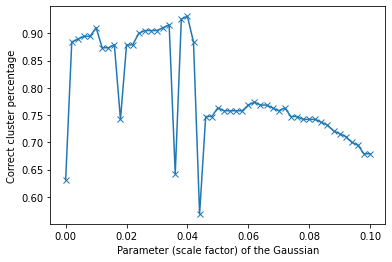

In [129]:
# plotting correctness vs c
plt.plot(cp_c,cp_results, marker = 'x')
plt.ylabel('Correct cluster percentage')
plt.xlabel('Parameter (scale factor) of the Gaussian')
plt.savefig('cp.png')

In [ ]:
# the cp methods bounds the error 0.5 as you will take inverse clusters if below (max function)